<a href="https://colab.research.google.com/github/DmarshalTU/Fast-AI/blob/master/DogCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from pathlib import Path
from fastai import *
from fastai.vision import *

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.390829,0.272035,0.083221,01:30
1,0.616064,0.250787,0.080514,01:29
2,0.387712,0.209216,0.066982,01:30
3,0.275342,0.196194,0.070365,01:30


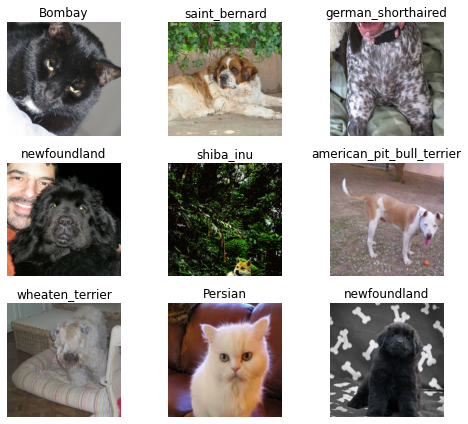

In [6]:
path = untar_data(URLs.PETS); path
path.ls()
path_anno = path /'annotations'
path_img = path /'images'

fnames = get_image_files(path_img)
fnames[:5]

np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,6))

print(data.classes)
len(data.classes),data.c  

learn = create_cnn(data, models.resnet34, metrics = error_rate)

learn.fit_one_cycle(4)

learn.save('stage-1')